In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras import utils, callbacks
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Add, Input, ZeroPadding2D, AveragePooling2D,GlobalAveragePooling2D
from keras.initializers import glorot_uniform
from keras.layers.merge import concatenate
import matplotlib.pyplot as plt
import cv2
import keras
from glob import glob
from numpy import floor
import random
from numpy.random import seed
seed(1)

ASL Alphabet for letter: S


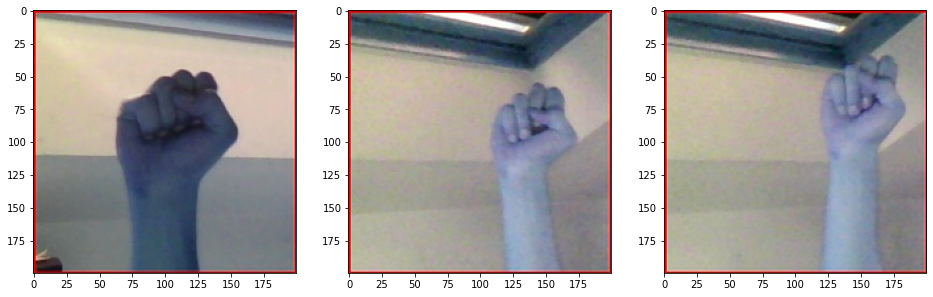

In [2]:
def plot_three_samples(letter):
    print("ASL Alphabet for letter: "+letter)
    base_path = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/'
    img_path = base_path + letter + '/**'
    path_contents = glob(img_path)
    
    plt.figure(figsize=(16,16))
    imgs = random.sample(path_contents,3)
    plt.subplot(1,3,1)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(1,3,2)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(1,3,3)
    plt.imshow(cv2.imread(imgs[2]))
    
    return

plot_three_samples('S')

In [3]:
path = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
path_test = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'
target_size = (64,64)
target_dims = (64,64,3)
val_frac = 0.1
n_classes = 29
batch_size = 64

image_generator = ImageDataGenerator(samplewise_center = True, samplewise_std_normalization = True, validation_split=val_frac)

train_gen = image_generator.flow_from_directory(path, target_size=target_size, batch_size=batch_size, shuffle=True, subset='training')
val_gen = image_generator.flow_from_directory(path, target_size=target_size, subset='validation')

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [4]:
lenet_5 = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(64, 64, 3), padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(29, activation='softmax') #Output layer
])

lenet_5.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
lenet_5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 32, 32, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               376440    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [5]:
lenet_5_model = lenet_5.fit(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10
1224/1224 [==============================] - 410s 332ms/step - loss: 1.7716 - accuracy: 0.5074 - val_loss: 1.2628 - val_accuracy: 0.5923
Epoch 2/10
1224/1224 [==============================] - 115s 94ms/step - loss: 0.2911 - accuracy: 0.9264 - val_loss: 1.3433 - val_accuracy: 0.6328
Epoch 3/10
1224/1224 [==============================] - 120s 98ms/step - loss: 0.1413 - accuracy: 0.9625 - val_loss: 1.3024 - val_accuracy: 0.6682
Epoch 4/10
1224/1224 [==============================] - 118s 96ms/step - loss: 0.0946 - accuracy: 0.9740 - val_loss: 1.4300 - val_accuracy: 0.6508
Epoch 5/10
1224/1224 [==============================] - 118s 97ms/step - loss: 0.0797 - accuracy: 0.9779 - val_loss: 1.4892 - val_accuracy: 0.6329
Epoch 6/10
1224/1224 [==============================] - 117s 95ms/step - loss: 0.0825 - accuracy: 0.9746 - val_loss: 1.5904 - val_accuracy: 0.6407
Epoch 7/10
1224/1224 [==============================] - 118s 97ms/step - loss: 0.0831 - accuracy: 0.9746 - val_loss: 